In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ds = pd.read_excel("C:/Users/18573/Downloads/INFO 6105 DS EMT/Assignment/Assignment4/play.xlsx")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     int64 
 2   Humidity     14 non-null     int64 
 3   Windy        14 non-null     object
 4   Decision     14 non-null     object
dtypes: int64(2), object(3)
memory usage: 688.0+ bytes


In [2]:
ds.head()

,Outlook,Temperature,Humidity,Windy,Decision
0,overcast,72,90,strong,play
1,overcast,83,78,weak,play
2,overcast,64,65,strong,play
3,overcast,81,75,weak,play
4,sunny,75,70,strong,play


In [3]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
ds['Outlook'] = encoder.fit_transform(ds['Outlook'])
ds['Windy'] = encoder.fit_transform(ds['Windy'])
ds['Decision'] = encoder.fit_transform(ds['Decision'])

ds

,Outlook,Temperature,Humidity,Windy,Decision
0,0,72,90,0,1
1,0,83,78,1,1
2,0,64,65,0,1
3,0,81,75,1,1
4,2,75,70,0,1
5,2,80,90,0,0
6,2,85,85,1,0
7,2,72,95,1,0
8,2,69,70,1,1
9,1,71,80,0,0


In [4]:
X = ds[ds.columns[ds.columns != 'Decision']]
y = ds.Decision

In [5]:
X

,Outlook,Temperature,Humidity,Windy
0,0,72,90,0
1,0,83,78,1
2,0,64,65,0
3,0,81,75,1
4,2,75,70,0
5,2,80,90,0
6,2,85,85,1
7,2,72,95,1
8,2,69,70,1
9,1,71,80,0


In [6]:
y

0     1
1     1
2     1
3     1
4     1
5     0
6     0
7     0
8     1
9     0
10    0
11    1
12    1
13    1
Name: Decision, dtype: int32

In [7]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, KMeans

#Compute single score
agg_single = AgglomerativeClustering(n_clusters=2, linkage='single')
agg_single_labels = agg_single.fit_predict(ds)

single_score = silhouette_score(ds, agg_single_labels)
print("Single Linkage Silhouette Score:", single_score)



Single Linkage Silhouette Score: 0.3540054643249449


In [8]:
#Compute complete score
agg_complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
agg_complete_labels = agg_complete.fit_predict(ds)

complete_score = silhouette_score(ds, agg_complete_labels)
print("Complete Linkage Silhouette Score:", complete_score)

Complete Linkage Silhouette Score: 0.41071187571725465


In [9]:
#Compute average score
agg_average = AgglomerativeClustering(n_clusters=2, linkage='average')
agg_average_labels = agg_average.fit_predict(ds)

average_score = silhouette_score(ds, agg_average_labels)
print("Average Linkage Silhouette Score:", average_score)

Average Linkage Silhouette Score: 0.3850344626755792


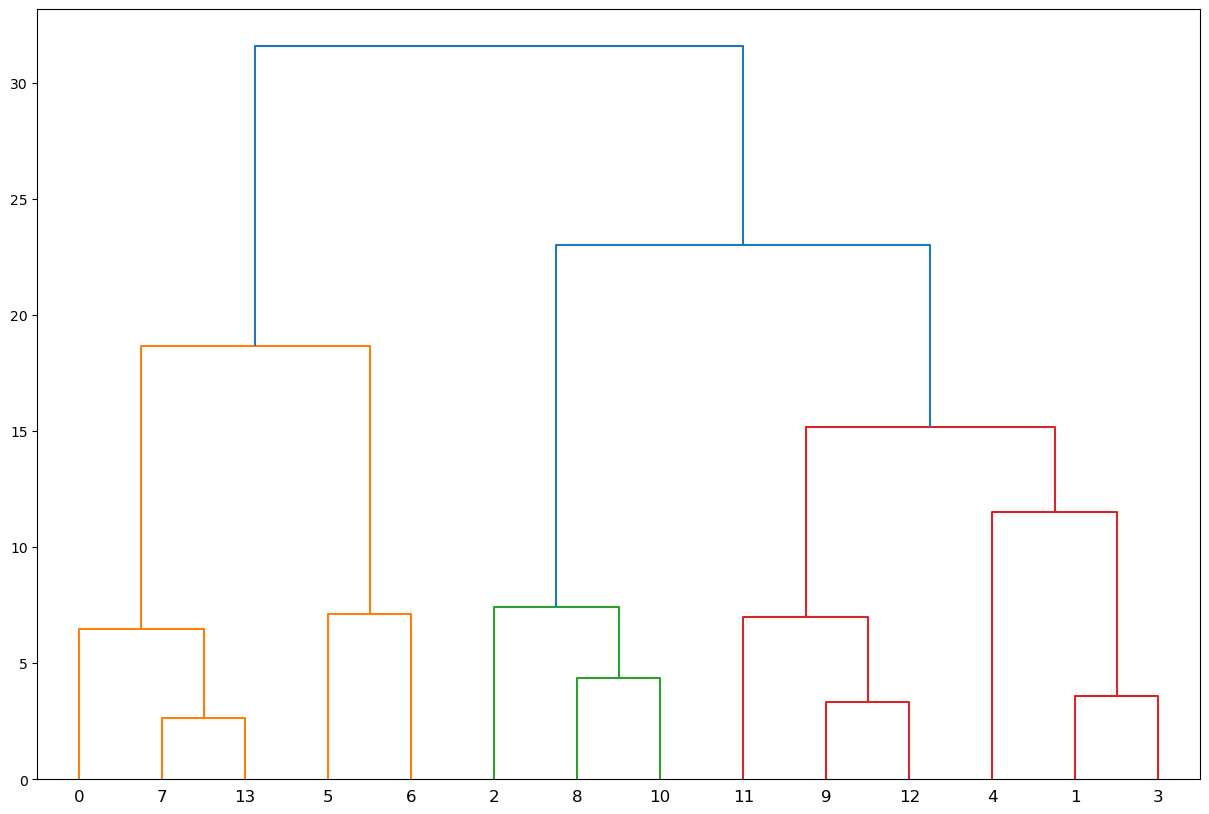

In [10]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

linkage_type = 'complete'
linkage_matrix = linkage(ds, linkage_type)
plt.figure(figsize=(15,10))

# plot using 'dendrogram()'
dendrogram(linkage_matrix)
plt.show()

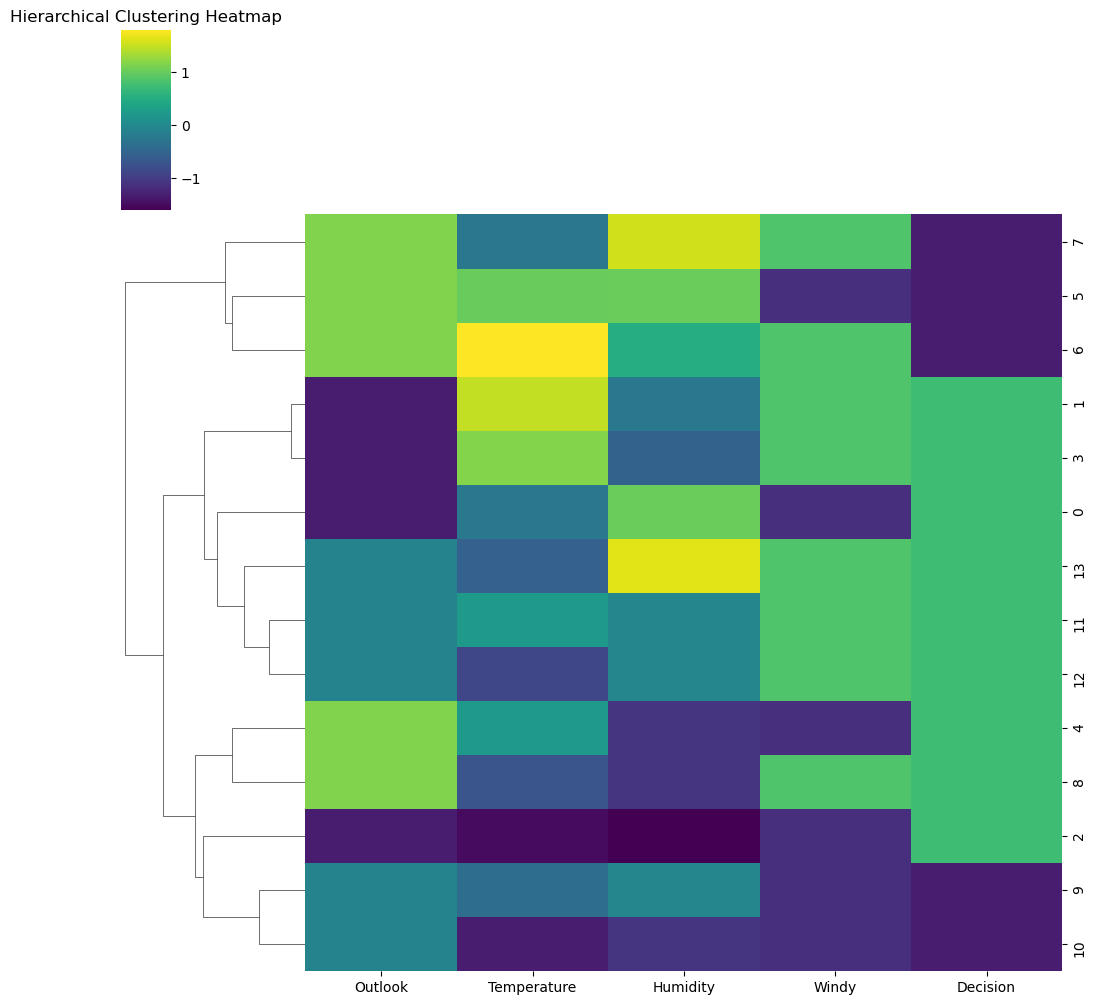

In [30]:
#Heatmap for hierarchical clustering

from sklearn.preprocessing import StandardScaler
import seaborn as sns

scaler = StandardScaler()
X = scaler.fit_transform(ds)

# Compute the linkage matrix
Z = linkage(X, method='complete')

# Plot the heatmap
sns.clustermap(X, row_linkage=Z, xticklabels=list(ds.columns), col_cluster=False, cmap='viridis')
plt.title("Hierarchical Clustering Heatmap")
plt.show()

In [11]:
from sklearn.datasets import make_circles

# Generating the data
X, _= make_circles(n_samples=1000, factor=0.5, noise=0.05)


In [12]:
#Computign single score

agg_single = AgglomerativeClustering(n_clusters=2, linkage='single')
agg_single_labels = agg_single.fit_predict(X)
single_score = silhouette_score(X, agg_single_labels)
print("Single Linkage Silhouette Score:", single_score)

Single Linkage Silhouette Score: 0.11261689272380218


In [13]:
#Computing complete score

agg_complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
agg_complete_labels = agg_complete.fit_predict(X)
complete_score = silhouette_score(X, agg_complete_labels)
print("Complete Linkage Silhouette Score:", complete_score)

Complete Linkage Silhouette Score: 0.3218032329880485


In [14]:
#Computing average score

agg_average = AgglomerativeClustering(n_clusters=2, linkage='average')
agg_average_labels = agg_average.fit_predict(X)
average_score = silhouette_score(X, agg_average_labels)
print("Average Linkage Silhouette Score:", average_score)

Average Linkage Silhouette Score: 0.34776224288150887


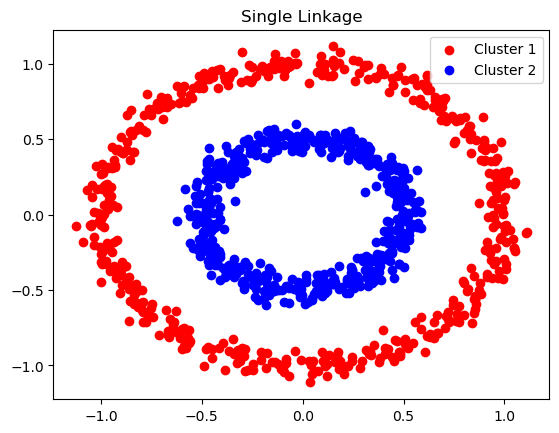

In [15]:
#Plot for single linkage

plt.figure()
plt.scatter(X[agg_single_labels==0, 0], X[agg_single_labels==0, 1], color='red', label='Cluster 1')
plt.scatter(X[agg_single_labels==1, 0], X[agg_single_labels==1, 1], color='blue', label='Cluster 2')
plt.title("Single Linkage")
plt.legend()

plt.show()

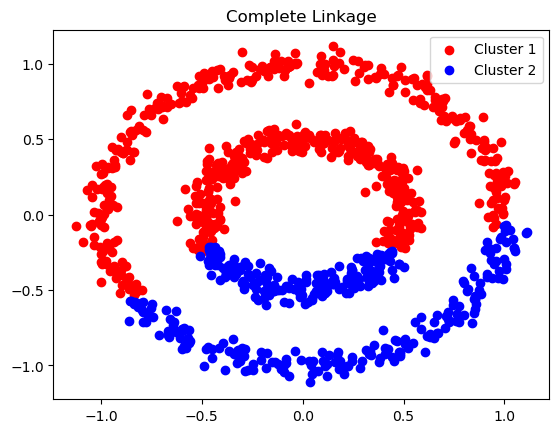

In [16]:
#Plot for complete linkage

plt.figure()
plt.scatter(X[agg_complete_labels==0, 0], X[agg_complete_labels==0, 1], color='red', label='Cluster 1')
plt.scatter(X[agg_complete_labels==1, 0], X[agg_complete_labels==1, 1], color='blue', label='Cluster 2')
plt.title("Complete Linkage")
plt.legend()

plt.show()

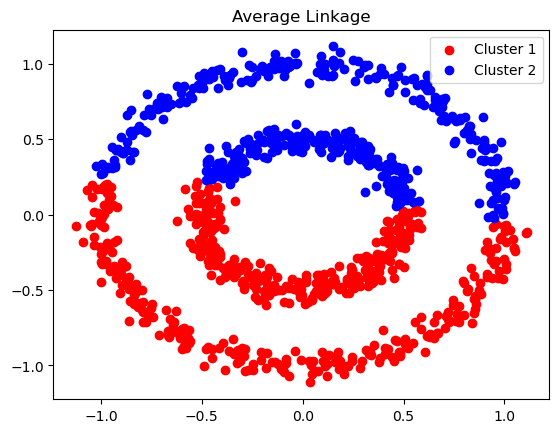

In [17]:
#Plot for Average linkage

plt.figure()
plt.scatter(X[agg_average_labels==0, 0], X[agg_average_labels==0, 1], color='red', label='Cluster 1')
plt.scatter(X[agg_average_labels==1, 0], X[agg_average_labels==1, 1], color='blue', label='Cluster 2')
plt.title("Average Linkage")
plt.legend()

plt.show()

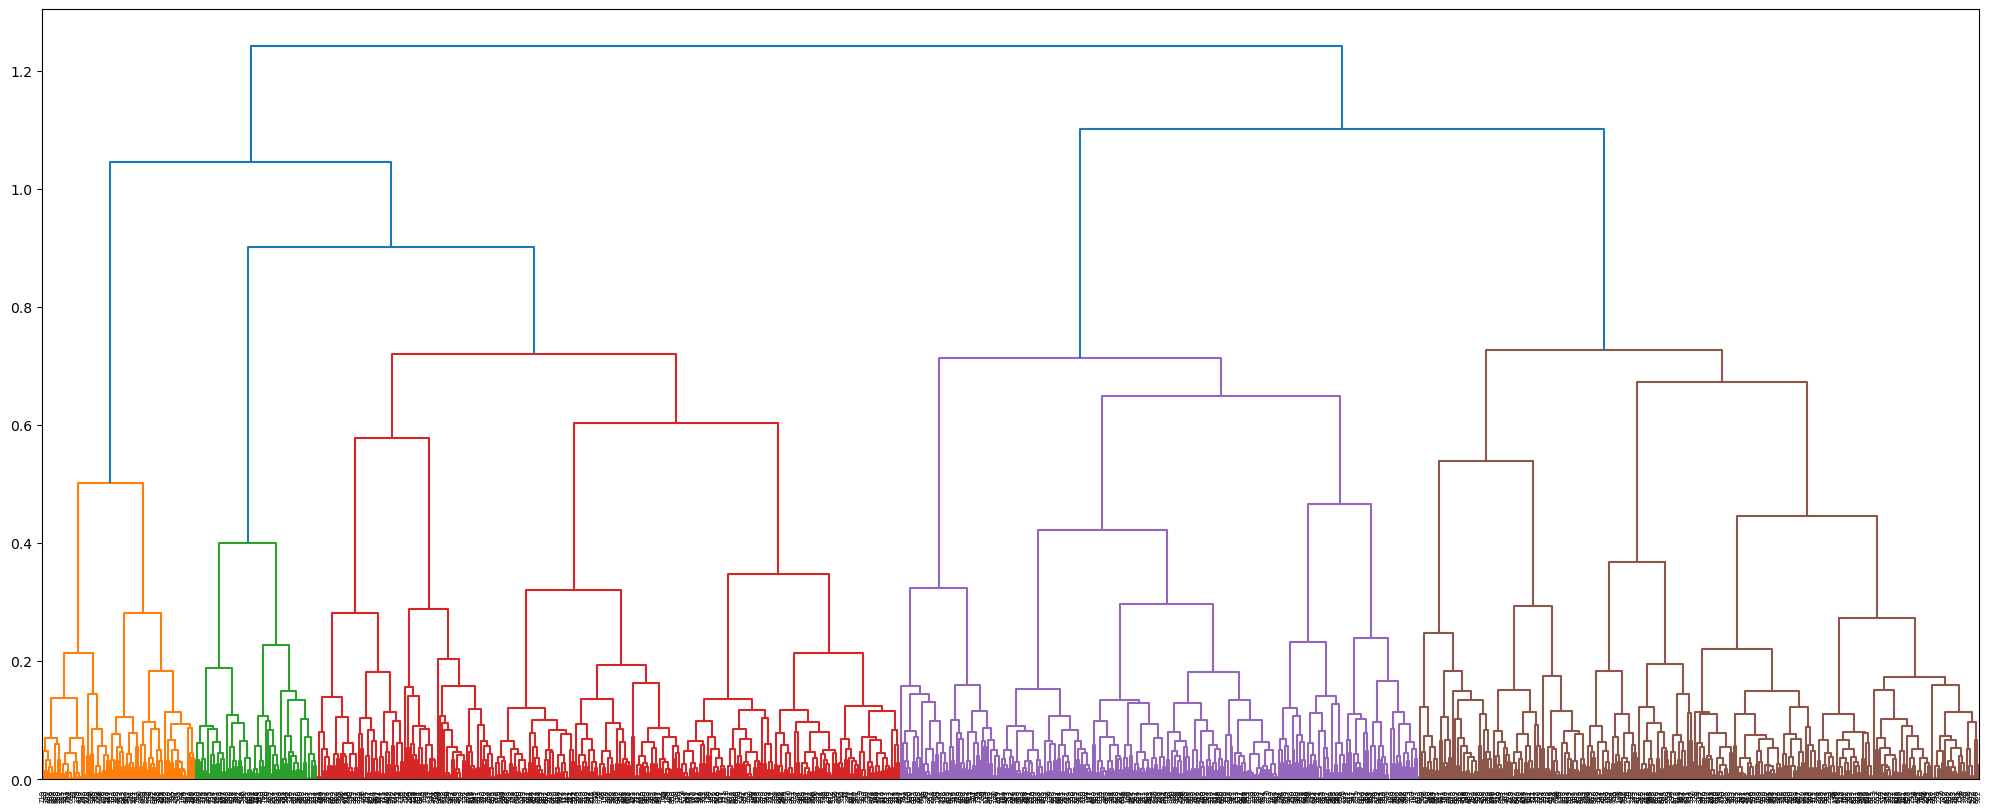

In [18]:
import scipy.cluster.hierarchy as sch

#Using average linkage
Z = sch.linkage(X, method='average')
plt.figure(figsize=(25, 10))
sch.dendrogram(Z)

plt.show()